# Differentiable Physics IV: Numerical Methods for Hyperbolic PDEs

Considering a second order PDE's:

$$A \frac{\partial ^ 2 u}{\partial x^2} + 2B \frac{\partial ^ 2 u}{\partial y \partial x} + C \frac{\partial ^ 2 u}{\partial y^2} = 0 $$

We can distinguish three cases, for each of which different numerial methods are applicable:

| Case | Name | Intuition | Numerical method | Example |
| --- | --- | --- | --- | --- |
| $B^2 - AC > 0$ | Elliptic | Equilibrium States <br/>--> no discontinuities  | Jacobi, SOR, FFT, Multigrid | Poisson Equation |
| $B^2 - AC = 0$ | Parabolic | Diffusion, Smoothing | Crank-Nicolson | Diffusion, Heat Equation |
| $B^2 - AC < 0$ | Hyperbolic | Waves | Lax, Upwind, Lax-Wendrof, Mac Cormack | Wave Equation |


We are going to focus on the hyperbolic case, because our main goal is to solve the navier stokes equations, which are hyperbolic.

## 1D Adevection & Upwind

Before looking at the more complex NS equations, we are trying to get an intuition for how to solve the more simple 1D advection equation. The advection equation is given by:

$$\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0 \tag{1}$$

where $a$ is the advection speed. We can interpret this equation as a transport equation, where the function $u$ is transported with the speed $a$. Using the Taylor expansion, we can find a solution for $u^{n+1}$ in terms of $u^n$:

$$u^{n+1} = u^n + \Delta t \frac{\partial u}{\partial t} + \frac{\Delta t^2}{2} \frac{\partial ^2 u}{\partial t^2} + \mathcal{O}(\Delta t^3)$$

Using (1) we can substitute the time derivatives:

$$u^{n+1} = u^n - a \Delta t \frac{\partial u}{\partial x} + \frac{a^2 \Delta t^2}{2} \frac{\partial ^2 u}{\partial t^2} + \mathcal{O}(\Delta t^3)$$

Using the finite difference method with the central difference we can replace the derivatives with the following approximations:

$$\frac{\partial u}{\partial x} \approx \frac{u_{i+1} - u_{i-1}}{2 \Delta x}$$

$$\frac{\partial ^2 u}{\partial x^2} \approx \frac{u_{i+1} - 2 u_i + u_{i-1}}{\Delta x^2}$$

Substituting these approximations into the Taylor expansion we get:

$$u^{n+1}_i = u^n_i - \frac{a \Delta t}{2 \Delta x} (u_{i+1} - u_{i-1}) + \frac{a^2 \Delta t^2}{2 \Delta x^2} (u_{i+1} - 2 u_i + u_{i-1}) + \mathcal{O}(\Delta t^3)$$

We can simplify this equation by defining the Courant number $C = \frac{a \Delta t}{\Delta x}$:

$$u^{n+1}_i = u^n_i - \frac{C}{2} (u_{i+1} - u_{i-1}) + \frac{C^2}{2} (u_{i+1} - 2 u_i + u_{i-1}) + \mathcal{O}(\Delta t^3) \tag{2}$$

Equation (2) can easily be implemented in python:


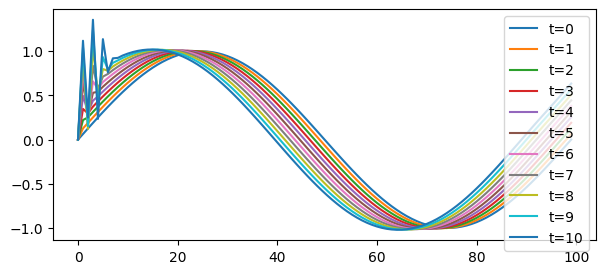

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def upwind_step(u : np.ndarray, dt : float, dx : float,  a : float) -> np.ndarray:
    C = a * dt / dx

    dudx = np.zeros_like(u)
    dudx[1:] = (u[1:] - u[:-1])

    du2dx2 = np.zeros_like(u)
    du2dx2[1:-1] = (u[2:] - 2*u[1:-1] + u[:-2])

    return u + C * dudx + C**2 / 2 * du2dx2

    
# simple wave for x
x = np.sin(2 * np.pi * np.linspace(0, 1, 100) * 1)

dt = 1
dx = 1
a = 1
xs = [x]

for i in range(10):
    x = upwind_step(x, dt, dx, a)
    xs.append(x)

plt.figure(figsize=(7, 3))
for i, x in enumerate(xs):
    plt.plot(x, '-', label=f"t={i}")

plt.legend()

Lets look at some of the numerical methods for hyperbolic PDEs:

| Method | Intuition | Example |
| --- | --- | --- |
| Lax | Explicit, first order in time and space | Wave Equation |
| Upwind | Explicit, first order in time and space | Wave Equation |
| Lax-Wendrof | Explicit, second order in time and space | Wave Equation |

## Non Linear Equations

What if the equation is non-linear? Lets assume an equation of the form:

$$\frac{\partial u}{\partial t} + \frac{\partial f(u)}{\partial x} = 0$$

where $f$ is a function on $u$. The Linear 1D advection equation is a special case of this equation, where $f(u) = a \cdot u$.

We can take the time derivative of the equation and obtain:

$$\frac{\partial^2 u}{\partial t^2} = - \frac{\partial^2 f(u)}{\partial t \partial x}$$

which is equivalent to:

$$\frac{\partial^2 u}{\partial t^2} = - \frac{\partial }{\partial x} \frac{\partial f(u)}{\partial t}$$

We then integrate with respect to $x$:



We can extend tis definition by adding the Jacobian matrix $A$ which is defined as:

$$A = \frac{\partial f(u)}{\partial u}$$

which translates to the change of $f$ with respect to $u$. We can now write the equation as:

$$\frac{\partial u}{\partial t} + A \frac{\partial u}{\partial x} = 0$$